# 영화 관객수 예측

# 목적 : 주어진 데이터를 바탕으로 영화의 관객수를 예측 해보세요!

1. movies_train.csv / movies_test.csv<br>
title : 영화의 제목<br>
distributor : 배급사<br>
genre : 장르<br>
release_time : 개봉일<br>
time : 상영시간(분)<br>
screening_rat : 상영등급<br>
director : 감독이름<br>
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)<br>
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)<br>
num_staff : 스텝수<br>
num_actor : 주연배우수<br>
box_off_num : 관객수<br>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('./data/movies_train.csv',encoding = 'cp949') # utf-8, cp949 사용
test = pd.read_csv('./data/movies_test.csv',encoding = 'cp949')
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [2]:
train.info() # nan 값이 dir_prev_bfnum 에 많음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [3]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# 데이터 전처리

In [6]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1) # dir_prev_bfnum 의 칼럼을 드랍함 , axis 는 열 
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [7]:
# 감독명 : 너무 다양해서 제거 의미가 없다고 판단 
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)
train

,title,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,0,431,4,2192525


In [8]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [9]:
train.distributor.value_counts() # 종류가 몇개인지 확인 

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [11]:
distributor_list = train.distributor.value_counts()[:5]
distributor_list

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
Name: distributor, dtype: int64

In [13]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))
train['distributor']

0       롯데엔터테인먼트
1             기타
2             기타
3         (주)NEW
4             기타
         ...    
595       (주)NEW
596           기타
597    (주)마운틴픽쳐스
598    CJ 엔터테인먼트
599    CJ 엔터테인먼트
Name: distributor, Length: 600, dtype: object

In [14]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4])) # string 이나 list만 슬라이싱이 가능하기 때문에 int 로 반환 
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [16]:
train

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398,2012,11
1,기타,느와르,130,청소년 관람불가,2,387,3,7072501,2015,11
2,기타,액션,123,15세 관람가,4,343,4,6959083,2013,6
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866,2012,7
4,기타,코미디,108,15세 관람가,1,251,2,483387,2010,11
...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,111,청소년 관람불가,1,510,7,1475091,2014,8
596,기타,드라마,127,15세 관람가,1,286,6,1716438,2013,3
597,(주)마운틴픽쳐스,공포,99,청소년 관람불가,0,123,4,2475,2010,9
598,CJ 엔터테인먼트,느와르,102,15세 관람가,0,431,4,2192525,2015,5


In [19]:
# 원핫 인코딩 , 범주형 변수로 구성돼있을때 사용 
train = pd.get_dummies(train)
test = pd.get_dummies(test)
train

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_CJ 엔터테인먼트,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,2012,11,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501,2015,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083,2013,6,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866,2012,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387,2010,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,1,510,7,1475091,2014,8,1,0,0,...,0,0,0,0,0,0,0,0,0,1
596,127,1,286,6,1716438,2013,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
597,99,0,123,4,2475,2010,9,0,1,0,...,0,0,0,0,0,0,0,0,0,1
598,102,0,431,4,2192525,2015,5,0,0,1,...,0,0,0,0,0,0,0,1,0,0


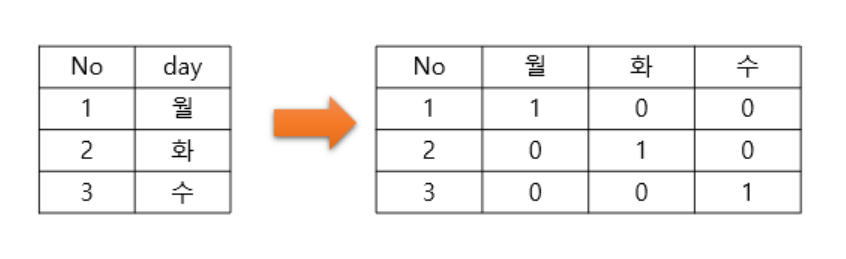

In [23]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']
train_x

,time,dir_prev_num,num_staff,num_actor,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_CJ 엔터테인먼트,distributor_기타,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,2012,11,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,2015,11,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,2013,6,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,2012,7,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,2010,11,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,1,510,7,2014,8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
596,127,1,286,6,2013,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
597,99,0,123,4,2010,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
598,102,0,431,4,2015,5,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# train_test_split

In [24]:
from sklearn.model_selection import train_test_split
train_x, val_x,train_y, val_y = train_test_split(train_x, train_y, test_size =0.2) # train_x 와 train_y 를 0.2비율로 train_x 와 val_x로 나눈다. 

In [25]:
train_x

,time,dir_prev_num,num_staff,num_actor,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_CJ 엔터테인먼트,distributor_기타,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
56,103,0,125,8,2015,5,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
439,70,0,20,1,2011,6,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
453,108,0,23,2,2015,12,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
567,72,0,0,2,2011,9,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
50,87,2,140,3,2014,10,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,97,0,51,3,2014,10,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
65,109,2,519,3,2015,11,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
104,121,1,95,2,2011,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
287,120,1,433,2,2014,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
model=RandomForestRegressor(n_estimators=1000) #  n_estimators : 생성할 tree의 개수 , 개수가 많을수록 오래걸림 정확함 
model.fit(train_x,train_y)

RandomForestRegressor(n_estimators=1000)

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

## 회귀 : 회귀분석은 종속 변수(목표)와 하나 이상의 독립 변수(예측 변수라고도 함) 간의 미래 사건을 예측하는 방법이다. 

## mae, mse
### mse( 평균 제곱 오차 )  : 💡 머신러닝뿐만 아니라 영상처리 영역에서도 자주 사용되는 추측값에 대한 정확성을 측정하는 방법이다. 추정한 값에 대한 정확도를 측정하는 쉬운 방법이기 때문에 자주 쓰인다. 머신러닝에서는 Cost Function(손실함수 혹은 비용함수)에서, 영상처리에서는 화질 개선을 위해 원본 대비 화질을 측정하는 PSNR에서 주로 쓰인다
#### 
- 오차의 제곱을 평균으로 나눈 것이다.
- MSE가 0에 가까울수록 추측한 값이 원본에 가까운 것이기 때문에 정확도가 높다고 할 수 있다.
- 예측값과 실제값 차이의 면적의 평균이라고 할 수 있다.
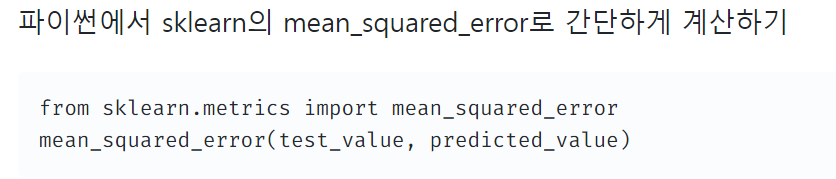

### mae( 평균 절대 오차 ) : 💡 회귀평가를 위한 지표로 주로 쓰인다. 기계 학습 모델의 퀄리티를 요약하고 평가하기 위한 여러 메트릭 중 하나라고 할 수 있다.MSE와 마찬가지로 0에 가까울수록 좋은 모델이라고 할 수 있다.
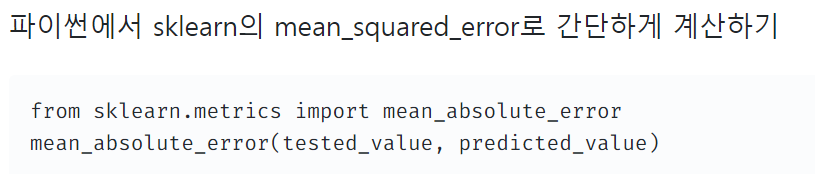

### r2_score ( 결정계수 ) : 상관계수를 제곱한 값을 보면 됨 , 회귀모델의 성능에 대한 평가지표 
- 1에 가까울수록 좋음 
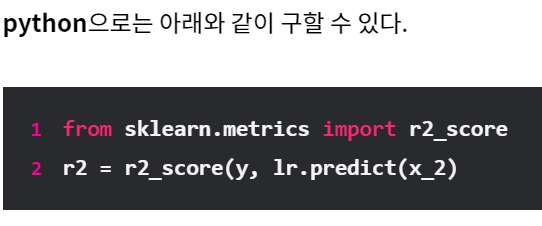

In [49]:
val_predict_y=model.predict(val_x)

In [44]:
val_predict_y

array([3.18095600e+03, 9.52886928e+05, 3.57870992e+05, 1.13915859e+06,
       2.26569230e+04, 9.74376504e+05, 7.61294890e+04, 2.20034410e+04,
       3.23813341e+05, 4.00420378e+06, 1.17346337e+06, 8.38148000e+03,
       6.38664853e+05, 1.12224653e+06, 4.28422660e+04, 6.72429452e+05,
       1.12814869e+05, 4.45518190e+04, 3.86413005e+06, 2.33399700e+03,
       7.43824500e+03, 9.96799576e+05, 1.20680242e+06, 1.33191100e+03,
       4.69074200e+06, 1.03178550e+04, 8.58919906e+05, 1.40973490e+04,
       8.49109451e+05, 8.34305012e+05, 3.02095040e+04, 2.96271000e+03,
       1.08969536e+06, 6.50367500e+03, 4.76668160e+04, 3.41958910e+06,
       1.87636155e+05, 1.91267900e+03, 1.44501838e+05, 2.39328073e+05,
       4.71145400e+03, 7.10403234e+06, 2.31687500e+03, 1.40845000e+03,
       2.01759900e+03, 4.16580606e+05, 2.91459886e+05, 4.50122770e+04,
       3.32972454e+05, 1.33821760e+04, 4.16165296e+05, 5.66738992e+05,
       2.00267090e+04, 2.11030471e+05, 1.72322570e+04, 5.61738500e+03,
      

In [51]:
val_y = val_y.values

In [52]:
val_y

array([     205,      485,     1599,   172652,      791,   321641,
             46,    21317,   507913,  1744585,   306642,       65,
        4786259,   471248,     5693,   346483,     1089,      482,
         956103,      424,     3916,   112029,     9323,      588,
       12983841,      600,    33902,     1198,   402876,   471547,
           3333,     7448,      236,      712,     4586,  1817069,
           9566,    31101,     4941,      809,      888,  1854711,
            514,     2186,    69122,     2821,      691,      893,
          94875,      971,      831,    27083,    68312,   472009,
           1611,      831,     1504,     1068,      703,    25391,
        2267579,  7759711,      389,     2146,     1217,  1110523,
          50308,     1575,      480,   790370,     1079,     8757,
          16866,    23802,  2141155,   978413,    35348,      745,
           1693,      677,     3223,     1356,  1201033,     4586,
         535657,   467697,     1132,  3009406,      446,   688

In [50]:
mean_absolute_error(val_y, val_predict_y) # 평균적으로 얼마나 틀리는지 예측 

592368.5365333334